Puzzle
-----

https://thefiddler.substack.com/p/can-you-meet-me-at-the-mall

"Instead of three total friends, now suppose there are four total friends (yourself included). As before, you all arrive at random times during the hour and each stay for 15 minutes.

On average, what would you expect the maximum number of friends meeting up to be?"

Fiddler has N = 3, extra credit has N = 4.

Solution
----

I think it is possible to do this as an integral analytically, if you do it very carefully, but it might be error prone. So, I am going to start with the computational approach, which seems easier to get right.

I am going to normalize all times as 0 to 1 (hours = 3pm to 4pm), and 15 minutes = 0.25 hours.

In [52]:
def max_overlapping_friends(times, duration=0.25):
    """
    Calculate the maximum number of overlapping friends at any given time.

    :param times: List of start times
    :param duration: Duration of each visit in hours (default is 0.25 hours, which is 15 minutes).
    :return: Maximum number of overlapping friends.
    """
    events = []
    
    for start in times:
        events.append((start, 'start'))
        events.append((start + duration, 'end'))
    
    # Sort events first by time, then by type ('end' before 'start' if they are at the same time)
    events.sort(key=lambda x: (x[0], x[1] == 'start'))

    max_overlap = 0
    current_overlap = 0

    for event in events:
        if event[1] == 'start':
            current_overlap += 1
            max_overlap = max(max_overlap, current_overlap)
        else:
            current_overlap -= 1

    return max_overlap

assert(max_overlapping_friends([0, 0.1, 0.2]) == 3), "Test case failed: Expected 3 overlapping friends at time 0.25"
assert(max_overlapping_friends([0, 0.3, 0.6]) == 1), "Test case failed: Expected 1 overlapping friends at time 0"
assert(max_overlapping_friends([0, 0.1, 0.2, 0.3, 0.4]) == 3), "Test case failed: Expected 3 overlapping friends at time 0.25"
assert(max_overlapping_friends([0, 0.1, 0.2, 0.3, 0.4], duration=0.5) == 5), "Test case failed: Expected 5 overlapping friends at time 0.25 with duration 0.5"

def average_uniform_sampling_A(N=3, S=50, fn=max_overlapping_friends):
    """
    Estimate the average number of overlapping friends using uniform sampling.

    :param N: number of friends / dimensions.
    :param S: number of samples per dimension.
    :param fn: Function to average - calculate the maximum overlapping friends.    
    :return: Estimated average number of overlapping friends.
    """
    import random
    import itertools as it

    pts_1dim = [i / S for i in range(S + 1)]
    pts_Ndim = it.product(pts_1dim, repeat=N)

    num_samples = (S+1) ** N
    total = 0

    for point in pts_Ndim:        
        total += fn(point)

    average = total / num_samples
    return average


def average_uniform_sampling_B(N=3, S=50, fn=max_overlapping_friends):
    """
    Estimate the average number of overlapping friends using uniform sampling.

    :param N: number of friends / dimensions.
    :param S: number of samples per dimension.
    :param fn: Function to average - calculate the maximum overlapping friends.    
    :return: Estimated average number of overlapping friends.
    """
    import random
    import itertools as it

    pts_1dim = [(0.5+i) / (S+1) for i in range(S+1)]
    pts_Ndim = it.product(pts_1dim, repeat=N)

    num_samples = (S+1) ** N
    total = 0

    for point in pts_Ndim:        
        total += fn(point)

    average = total / num_samples
    return average

def average_monte_carlo_sampling(N=3, S=50, fn=max_overlapping_friends):
    """
    Estimate the average number of overlapping friends using Monte Carlo sampling.

    :param N: number of friends / dimensions.
    :param S: number of samples per dimension.
    :param fn: Function to average - calculate the maximum overlapping friends.    
    :return: Estimated average number of overlapping friends.
    """
    import random

    num_samples = (S+1) ** N
    total = 0

    for _ in range(num_samples):
        point = [random.uniform(0, 1) for _ in range(N)]
        total += fn(point)

    average = total / num_samples
    return average

def solve_puzzle(N=3, S_list=[50, 100, 1000], methods=[average_monte_carlo_sampling, average_uniform_sampling_A, average_uniform_sampling_B], expected=None):
    """
    Solve the puzzle by calculating the average number of overlapping friends.

    :param N: number of friends / dimensions.
    :param S_list: number of samples per dimension.
    :return: Estimated average number of overlapping friends.
    """
    import time
    results = {}
    errors = {}
    for method in methods:
        start_time = time.time()
        results[method.__name__] = {}
        errors[method.__name__] = {}
        print(f"Using method: {method.__name__}")
        for S in S_list:
            avg = method(N=N, S=S)
            results[method.__name__][S] = avg
            if expected is not None:
                err = abs(1 - (avg / expected))
                errors[method.__name__][S] = err
                err_str = f"[{err:.5f}]"
            else:
                err_str = ''
            print(f"Average max overlapping friends: method {method.__name__}: (S={S}): {avg:.7f} {err_str}")
        elapsed_time = time.time() - start_time
        print(f"Elapsed time for {method.__name__}: {elapsed_time:.2f} seconds")
    if expected is not None:
        # plot the errors on a log-log scale
        import matplotlib.pyplot as plt
        for method in methods:
            plt.plot(S_list, [errors[method.__name__][S] for S in S_list], label=method.__name__)
        plt.xscale('log')
        plt.yscale('log')
        plt.xlabel('Number of Samples (S)')
        plt.ylabel('Relative Error')
        plt.legend()
    return 


----

Let's First check the N=2 case, for which I calculated the answer exactly. $(23/16 = 1.4375)$

Using method: average_monte_carlo_sampling
Average max overlapping friends: method average_monte_carlo_sampling: (S=51): 1.4349112 [0.00180]
Average max overlapping friends: method average_monte_carlo_sampling: (S=63): 1.4230957 [0.01002]
Average max overlapping friends: method average_monte_carlo_sampling: (S=64): 1.4314793 [0.00419]
Average max overlapping friends: method average_monte_carlo_sampling: (S=65): 1.4361800 [0.00092]
Average max overlapping friends: method average_monte_carlo_sampling: (S=99): 1.4358000 [0.00118]
Average max overlapping friends: method average_monte_carlo_sampling: (S=100): 1.4377022 [0.00014]
Average max overlapping friends: method average_monte_carlo_sampling: (S=101): 1.4344483 [0.00212]
Average max overlapping friends: method average_monte_carlo_sampling: (S=129): 1.4394675 [0.00137]
Average max overlapping friends: method average_monte_carlo_sampling: (S=201): 1.4406921 [0.00222]
Average max overlapping friends: method average_monte_carlo_sampling: (

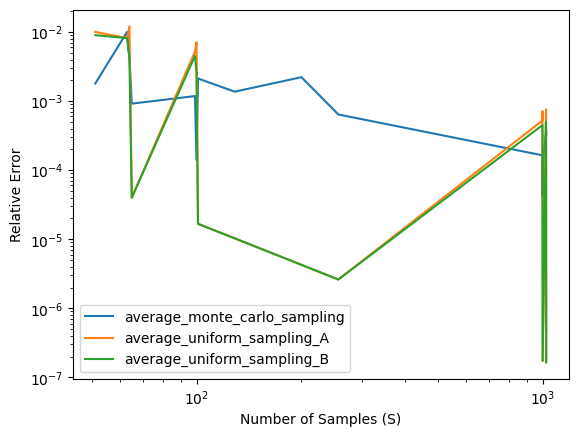

In [53]:
solve_puzzle(N=2, S_list=[51,63,64,65,99,100,101,129,201,257,999,1000,1001,1023,1024,1025], expected=23/16)

Using method: average_monte_carlo_sampling
Average max overlapping friends: method average_monte_carlo_sampling: (S=90): 1.4439077 [0.00446]
Average max overlapping friends: method average_monte_carlo_sampling: (S=91): 1.4389178 [0.00099]
Average max overlapping friends: method average_monte_carlo_sampling: (S=92): 1.4377385 [0.00017]
Average max overlapping friends: method average_monte_carlo_sampling: (S=93): 1.4343594 [0.00218]
Average max overlapping friends: method average_monte_carlo_sampling: (S=94): 1.4354571 [0.00142]
Average max overlapping friends: method average_monte_carlo_sampling: (S=95): 1.4344618 [0.00211]
Average max overlapping friends: method average_monte_carlo_sampling: (S=96): 1.4427676 [0.00366]
Average max overlapping friends: method average_monte_carlo_sampling: (S=97): 1.4361724 [0.00092]
Average max overlapping friends: method average_monte_carlo_sampling: (S=98): 1.4425059 [0.00348]
Average max overlapping friends: method average_monte_carlo_sampling: (S=99

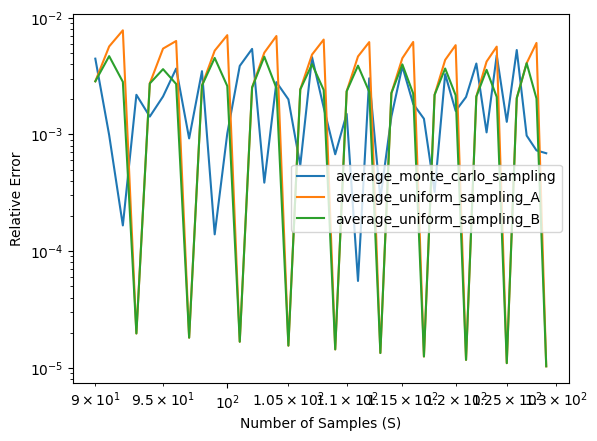

In [57]:
solve_puzzle(N=2, S_list=[_ for _ in range(90, 130)], expected=23/16)

Surprise - things are more accurate with higher numbers of samples. :)

But Monte Carlo more even across number of samples.

uniform A and B have the same best case, but B has a better worst case.

Also, Monte Carlo takes somewhat longer, presumably because of the time spent generating random numbers, which is slower than just calculating coordinates.

For the uniform sampling, numbers of the form 4k + 1 have significantly higher accuracy than the others. Not exactly sure why, but probably the sampling errors cancel out nicely for this function. We'll use those below.

----

In [54]:
solve_puzzle(N=3, S_list=[101,129,201,257])

Using method: average_monte_carlo_sampling
Average max overlapping friends: method average_monte_carlo_sampling: (S=101): 2.0318882 
Average max overlapping friends: method average_monte_carlo_sampling: (S=129): 2.0310756 
Average max overlapping friends: method average_monte_carlo_sampling: (S=201): 2.0313757 
Average max overlapping friends: method average_monte_carlo_sampling: (S=257): 2.0311345 
Elapsed time for average_monte_carlo_sampling: 64.25 seconds
Using method: average_uniform_sampling_A
Average max overlapping friends: method average_uniform_sampling_A: (S=101): 2.0313341 
Average max overlapping friends: method average_uniform_sampling_A: (S=129): 2.0313018 
Average max overlapping friends: method average_uniform_sampling_A: (S=201): 2.0312714 
Average max overlapping friends: method average_uniform_sampling_A: (S=257): 2.0312631 
Elapsed time for average_uniform_sampling_A: 44.42 seconds
Using method: average_uniform_sampling_B
Average max overlapping friends: method ave

In [55]:
solve_puzzle(N=4, S_list=[51,65,101])

Using method: average_monte_carlo_sampling
Average max overlapping friends: method average_monte_carlo_sampling: (S=51): 2.4765765 
Average max overlapping friends: method average_monte_carlo_sampling: (S=65): 2.4765985 
Average max overlapping friends: method average_monte_carlo_sampling: (S=101): 2.4765278 
Elapsed time for average_monte_carlo_sampling: 362.24 seconds
Using method: average_uniform_sampling_A
Average max overlapping friends: method average_uniform_sampling_A: (S=51): 2.4467882 
Average max overlapping friends: method average_uniform_sampling_A: (S=65): 2.4768638 
Average max overlapping friends: method average_uniform_sampling_A: (S=101): 2.4766886 
Elapsed time for average_uniform_sampling_A: 239.09 seconds
Using method: average_uniform_sampling_B
Average max overlapping friends: method average_uniform_sampling_B: (S=51): 2.4498004 
Average max overlapping friends: method average_uniform_sampling_B: (S=65): 2.4768638 
Average max overlapping friends: method average_u

--- 
Conclusions
---

**Fiddler**

From the numerical results, we can be reasonably sure that the result is 2.031. By analogy with the 2D case, it is very likely that the exact result is $65/32 = 2.03125$.

**Extra Credit**

From the numerical results, we can be reasonably sure that the result is 2.476. By similar analogies, I am guessing that the exact result is $317/128 = 2.4765625$.

**Large N**

I am pretty sure the result for large N is going to be $N/4$ plus some correction terms to increase it slightly. But I don't know how to calculate these corrections.
